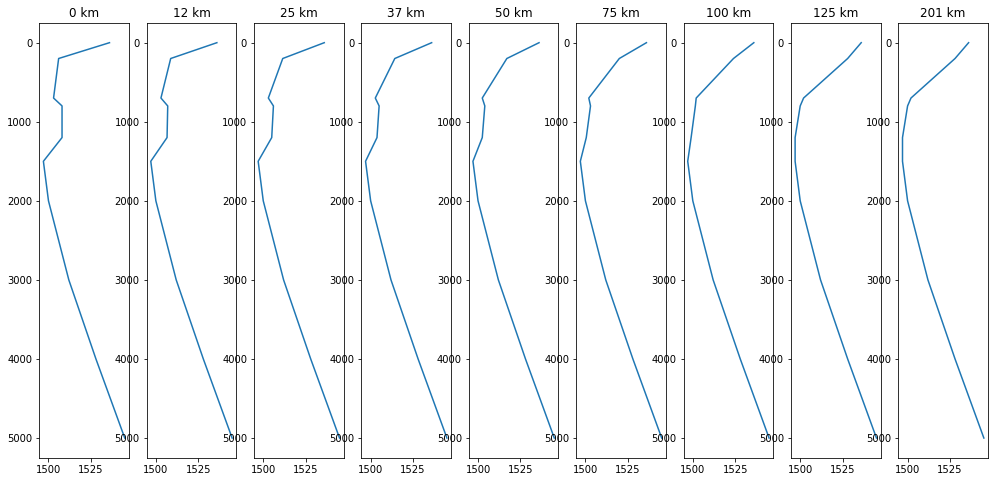

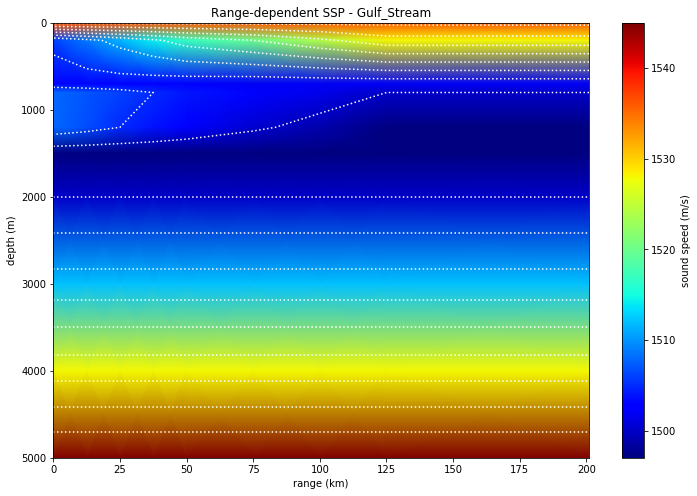

In [2]:
#import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np


def bellhop_plotssp2D (dir_env, file_SSP):
    '''
    Parameters
    ----------
    dir_env: str
        Directory where file will be created
    file_SSP: str
        File containing sound speed profile    
    '''
    
    
    ############################### read file .ssp #####################################
    
    fid = open(file_SSP,'r')
   
    NProf = int( np.fromfile( fid, float, 1, sep = " " ) )  # number of profiles 
    rProf = np.fromfile( fid, float, NProf, sep = " " )     # range of each profile
    values = np.fromfile (fid, float, -1, sep=" ")          # all the values in .ssp
    n_line = int(len(values)/NProf)                         # number of lines per profile
    cmat = np.zeros((n_line,NProf))                         # sound speed matrix
    
    for i in range (n_line) :
        cmat[i,:] = values[i*NProf:(i+1)*NProf]
    
    fid.close()

    
    ######################## read file .env (to have depths) ##########################
    
    file_env = file_SSP[:-4]+'.env'
    fid = open (file_env,'r')
    f = fid.readlines()
    
    depth = np.zeros(n_line)     # depths corresponding to profile values
    for i in range(n_line):
        data =f[i+5].split()
        depth[i] =data[0]
    
    fid.close()
    
    
    ################################# plot ssp2D ######################################
    
    plt.figure(figsize=(17,8))
    for i in range(NProf):
        plt.subplot (1,NProf,i+1)
        plt.plot(cmat[:,i],depth)
        plt.gca().invert_yaxis()
        plt.title('%d km' %rProf[i])
    
    plt.savefig('profiles_'+file_SSP[:-4], dpi=100)
    
    
    
    plt.figure(figsize=(12,8))
    plt.pcolormesh(rProf, depth, cmat, shading='gouraud', cmap ='jet')
    plt.gca().invert_yaxis()
    cbar = plt.colorbar()
    cbar.set_label("sound speed (m/s)")
    plt.title ("Range-dependent SSP - "+file_SSP[:-4])
    plt.xlabel("range (km)")
    plt.ylabel("depth (m)")
    plt.contour(rProf, depth,cmat,10,colors='w',linestyles='dotted')
    
    plt.savefig('range-dependent SSP_'+file_SSP[:-4], dpi=100)
    
    
if __name__ == '__main__':

    dir_env = './'
    file_SSP = 'Gulf_Stream.ssp'

    bellhop_plotssp2D(dir_env, file_SSP)

